In [2]:
import numpy as np

In [3]:
my_arr = np.arange(1000000)

In [4]:
my_list = list(range(1000000))

In [5]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 16.5 ms, sys: 340 µs, total: 16.8 ms
Wall time: 15.1 ms


In [6]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 488 ms, sys: 153 ms, total: 640 ms
Wall time: 638 ms


In [7]:
import numpy as np

In [8]:
data = np.random.randn(2, 3)

In [9]:
data

array([[ 0.82171428,  0.91261238,  1.34875663],
       [-2.76556836, -1.10665999,  1.10475078]])

In [10]:
data * 10

array([[  8.21714276,   9.12612382,  13.48756629],
       [-27.6556836 , -11.06659992,  11.0475078 ]])

In [11]:
data + data

array([[ 1.64342855,  1.82522476,  2.69751326],
       [-5.53113672, -2.21331998,  2.20950156]])

In [12]:
data.shape

(2, 3)

In [13]:
data.dtype

dtype('float64')

In [14]:
data1 = [6, 7.5, 8, 0, 1, ]

In [15]:
arr1 = np.array(data1)

In [16]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [17]:
data2 = [[1, 2, 3, 4, ], [5, 6, 7, 8, ]]

In [18]:
arr2 = np.array(data2)

In [19]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [20]:
arr2.ndim

2

In [21]:
arr2.shape

(2, 4)

In [22]:
arr1.dtype

dtype('float64')

In [23]:
arr2.dtype

dtype('int64')

In [24]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [26]:
np.empty((2, 3, 2))

array([[[4.6752155e-310, 0.0000000e+000],
        [0.0000000e+000, 0.0000000e+000],
        [0.0000000e+000, 0.0000000e+000]],

       [[0.0000000e+000, 0.0000000e+000],
        [0.0000000e+000, 0.0000000e+000],
        [0.0000000e+000, 0.0000000e+000]]])

In [27]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [28]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

In [29]:
arr2 = np.array([1, 2, 3, ], dtype=np.int32)

In [30]:
arr1.dtype

dtype('float64')

In [31]:
arr2.dtype

dtype('int32')

In [32]:
arr = np.array([1, 2, 3, 4, 5])

In [33]:
arr.dtype

dtype('int64')

In [34]:
float_arr = arr.astype(np.float64)

In [35]:
float_arr.dtype

dtype('float64')

In [36]:
arr = np.array([3,7, -1.2, -2.6, 0.5, 12.9, 10.1, ])

In [37]:
arr

array([ 3. ,  7. , -1.2, -2.6,  0.5, 12.9, 10.1])

In [38]:
arr.astype(np.int32)

array([ 3,  7, -1, -2,  0, 12, 10], dtype=int32)

In [39]:
numeric_strings = np.array(['1.25', '-9.6', '42', ], dtype=np.string_)

In [40]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [41]:
int_array = np.arange(10)

In [42]:
clibers = np.array([.22, .270, .357, .380, .44, .50, ], dtype=np.float64)

In [43]:
int_array.astype(clibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [44]:
empty_uint32 = np.empty(8, dtype='u4')

In [45]:
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

In [46]:
arr = np.array([[1., 2., 3., ], [4., 5., 6., ]])

In [47]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [48]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [49]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [50]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [51]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [52]:
arr2 = np.array([[0., 4., 1., ], [7., 2., 12., ]])

In [53]:
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [54]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

In [55]:
arr = np.arange(10)

In [56]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [57]:
arr[5]

5

In [58]:
arr[5:8]

array([5, 6, 7])

In [59]:
arr[5:8] = 12

In [60]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [61]:
arr_slice = arr[5:8]

In [62]:
arr_slice

array([12, 12, 12])

In [63]:
arr_slice[1] = 12345

In [64]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [65]:
arr_slice[:] = 64

In [66]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [67]:
arr_2d = np.array([[1, 2, 3,], [4, 5, 6, ], [7, 8, 9, ]])

In [68]:
arr_2d[2]

array([7, 8, 9])

In [69]:
arr_2d[0][2]

3

In [70]:
arr_2d[0, 2]

3

In [71]:
arr_3d = np.array([[[1, 2, 3, ], [4, 5, 6, ]], [[7, 8, 9, ], [10, 11, 12, ]]])

In [72]:
arr_3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [73]:
arr_3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [74]:
old_values = arr_3d[0].copy()

In [75]:
arr_3d[0] = 42

In [76]:
arr_3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [77]:
arr_3d[0] = old_values

In [78]:
arr_3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [79]:
arr_3d[1, 0]

array([7, 8, 9])

In [80]:
x = arr_3d[1]

In [81]:
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [82]:
x[0]

array([7, 8, 9])

In [83]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [84]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [85]:
arr_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [86]:
arr_2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [87]:
arr_2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [88]:
arr_2d[1, :2]

array([4, 5])

In [89]:
arr_2d[:2, 2]

array([3, 6])

In [90]:
arr_2d[:, :1]

array([[1],
       [4],
       [7]])

In [91]:
arr_2d[:2, 1:] = 0

In [92]:
arr_2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

In [93]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [94]:
data = np.random.randn(7, 4)

In [95]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [96]:
data

array([[ 1.01891343,  0.07294878, -0.31518796,  0.41042513],
       [-0.07296331,  0.47688611, -0.94174706,  0.49812471],
       [-0.64344283,  0.89798465,  0.33351642, -1.80765264],
       [ 0.98512525, -0.25070321, -0.13887708, -0.19173721],
       [-0.62933106,  0.54949807,  0.65034904, -1.12404608],
       [ 1.83310897, -1.25338894,  0.63065715,  0.31920584],
       [-3.22357535, -0.21907411, -1.00323833,  0.80966714]])

In [97]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [98]:
data[names == 'Bob']

array([[ 1.01891343,  0.07294878, -0.31518796,  0.41042513],
       [ 0.98512525, -0.25070321, -0.13887708, -0.19173721]])

In [99]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [100]:
data[~(names == 'Bob')]

array([[-0.07296331,  0.47688611, -0.94174706,  0.49812471],
       [-0.64344283,  0.89798465,  0.33351642, -1.80765264],
       [-0.62933106,  0.54949807,  0.65034904, -1.12404608],
       [ 1.83310897, -1.25338894,  0.63065715,  0.31920584],
       [-3.22357535, -0.21907411, -1.00323833,  0.80966714]])

In [101]:
cond = names == 'Bob'

In [102]:
data[~cond]

array([[-0.07296331,  0.47688611, -0.94174706,  0.49812471],
       [-0.64344283,  0.89798465,  0.33351642, -1.80765264],
       [-0.62933106,  0.54949807,  0.65034904, -1.12404608],
       [ 1.83310897, -1.25338894,  0.63065715,  0.31920584],
       [-3.22357535, -0.21907411, -1.00323833,  0.80966714]])

In [103]:
mask = (names == 'Bob') | (names == 'Will')

In [104]:
mask

array([ True, False,  True,  True,  True, False, False])

In [105]:
data[mask]

array([[ 1.01891343,  0.07294878, -0.31518796,  0.41042513],
       [-0.64344283,  0.89798465,  0.33351642, -1.80765264],
       [ 0.98512525, -0.25070321, -0.13887708, -0.19173721],
       [-0.62933106,  0.54949807,  0.65034904, -1.12404608]])

In [106]:
data[data < 0] = 0

In [107]:
data

array([[1.01891343, 0.07294878, 0.        , 0.41042513],
       [0.        , 0.47688611, 0.        , 0.49812471],
       [0.        , 0.89798465, 0.33351642, 0.        ],
       [0.98512525, 0.        , 0.        , 0.        ],
       [0.        , 0.54949807, 0.65034904, 0.        ],
       [1.83310897, 0.        , 0.63065715, 0.31920584],
       [0.        , 0.        , 0.        , 0.80966714]])

In [108]:
data[names != 'Joe'] = 7

In [109]:
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.47688611, 0.        , 0.49812471],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [1.83310897, 0.        , 0.63065715, 0.31920584],
       [0.        , 0.        , 0.        , 0.80966714]])

In [110]:
arr = np.empty((8, 4))

In [111]:
for i in range(8): arr[i] = i

In [112]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [113]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [114]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [115]:
arr = np.arange(32).reshape((8, 4))

In [116]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [117]:
arr[[1, 5, 7, 2, ], [0, 3, 1, 2, ]]

array([ 4, 23, 29, 10])

In [118]:
arr[[1, 5, 7, 2, ]][:, [0, 3, 1, 2, ]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [119]:
arr = np.arange(15).reshape((3, 5))

In [120]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [121]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [122]:
arr = np.random.randn(6, 3)

In [123]:
arr

array([[-0.87346841, -1.24674497, -0.59492534],
       [ 0.76954577,  1.1185985 ,  0.36935034],
       [ 0.48171553,  1.07703279,  2.67244706],
       [-0.39373628,  0.47676758, -1.5776729 ],
       [ 0.27350181, -1.49700369, -1.12257427],
       [ 0.30640243, -0.2203219 ,  1.57926081]])

In [124]:
np.dot(arr.T, arr)
# np.dot(arr, arr.T)

array([[ 1.91091154,  1.80396743,  2.88929004],
       [ 1.80396743,  6.48250435,  4.6135568 ],
       [ 2.88929004,  4.6135568 , 13.87561861]])

In [125]:
arr = np.arange(16).reshape((2, 2, 4))

In [126]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [127]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [128]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [129]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [130]:
arr = np.arange(10)

In [131]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [132]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [133]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [134]:
x = np.random.randn(8)

In [135]:
y = np.random.randn(8)

In [136]:
x

array([ 0.85047228,  0.98659011,  1.07600896,  1.34710625, -1.3650571 ,
       -0.13887269,  0.54070137,  0.43640631])

In [137]:
y

array([-0.46887412,  0.28155839,  1.0938202 ,  0.4720688 , -0.94842524,
        0.5100696 ,  0.74811156,  1.18772859])

In [138]:
np.maximum(x, y)

array([ 0.85047228,  0.98659011,  1.0938202 ,  1.34710625, -0.94842524,
        0.5100696 ,  0.74811156,  1.18772859])

In [139]:
arr = np.random.randn(7) * 5

In [140]:
arr

array([-0.85584228,  9.48946248, -0.85916564,  4.14370081, -1.90724112,
        0.81867328,  4.6400282 ])

In [141]:
remainder, whole_part = np.modf(arr)

In [142]:
remainder

array([-0.85584228,  0.48946248, -0.85916564,  0.14370081, -0.90724112,
        0.81867328,  0.6400282 ])

In [143]:
whole_part

array([-0.,  9., -0.,  4., -1.,  0.,  4.])

In [144]:
arr

array([-0.85584228,  9.48946248, -0.85916564,  4.14370081, -1.90724112,
        0.81867328,  4.6400282 ])

In [145]:
np.sqrt(arr)

ipykernel_launcher:1: RuntimeWarning: invalid value encountered in sqrt


array([       nan, 3.08049712,        nan, 2.03560822,        nan,
       0.90480566, 2.15407247])

In [146]:
np.sqrt(arr, arr)

ipykernel_launcher:1: RuntimeWarning: invalid value encountered in sqrt


array([       nan, 3.08049712,        nan, 2.03560822,        nan,
       0.90480566, 2.15407247])

In [147]:
arr

array([       nan, 3.08049712,        nan, 2.03560822,        nan,
       0.90480566, 2.15407247])

In [148]:
points = np.arange(-5, 5, 0.01)

In [149]:
xs, ys = np.meshgrid(points, points)

In [150]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [151]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [152]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [153]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Image plot $\\sqrt{x^2, y^2}$ for a grid of values')

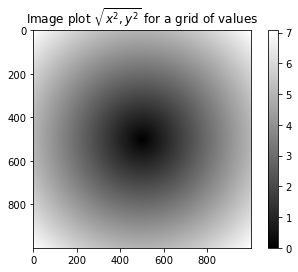

In [154]:
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot $\sqrt{x^2, y^2}$ for a grid of values")

In [155]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

In [156]:
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [157]:
cond = np.array([True, False, True, True, False])

In [158]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

In [159]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [160]:
result = np.where(cond, xarr, yarr)

In [161]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [162]:
arr = np.random.randn(4, 4)

In [163]:
arr

array([[-0.39289438, -1.21064888,  0.002766  ,  0.06387997],
       [-0.30866117,  0.78745439, -1.86989462,  0.23342474],
       [-0.50974737,  0.94190638,  0.5486736 , -0.8630978 ],
       [ 0.48093215,  0.91638099,  0.11470473,  1.1139837 ]])

In [164]:
arr > 0

array([[False, False,  True,  True],
       [False,  True, False,  True],
       [False,  True,  True, False],
       [ True,  True,  True,  True]])

In [165]:
np.where(arr > 0, 2, -2)

array([[-2, -2,  2,  2],
       [-2,  2, -2,  2],
       [-2,  2,  2, -2],
       [ 2,  2,  2,  2]])

In [166]:
np.where(arr > 0, 2, arr)

array([[-0.39289438, -1.21064888,  2.        ,  2.        ],
       [-0.30866117,  2.        , -1.86989462,  2.        ],
       [-0.50974737,  2.        ,  2.        , -0.8630978 ],
       [ 2.        ,  2.        ,  2.        ,  2.        ]])

In [167]:
arr = np.random.randn(5, 4)

In [168]:
arr

array([[-0.51822404, -2.24822228, -0.53856637, -0.82779709],
       [-2.55456589,  0.40757207,  0.63512645, -0.04767266],
       [ 1.08320049, -0.46127838, -0.17253772, -1.02616973],
       [-2.77159874, -1.02832981,  0.35258566,  0.3691295 ],
       [-1.67340693,  2.21258334,  0.06236729, -0.11451665]])

In [169]:
arr.mean()

-0.4430160746600727

In [170]:
np.mean(arr)

-0.4430160746600727

In [171]:
arr.sum()

-8.860321493201454

In [172]:
arr.mean(axis=1)

array([-1.03320244, -0.38988501, -0.14419633, -0.76955335,  0.12175676])

In [173]:
arr.sum(axis=0)

array([-6.43459511, -1.11767507,  0.33897532, -1.64702663])

In [174]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [175]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [176]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [177]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [178]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [179]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

In [180]:
arr = np.random.randn(100)

In [181]:
(arr > 0).sum()

44

In [182]:
bools = np.array([False, False, True, False])

In [183]:
bools.any()

True

In [184]:
bools.all()

False

In [185]:
arr = np.random.randn(6)

In [186]:
arr

array([ 1.81282799, -1.93869491,  0.45495251,  1.36247218,  0.54985144,
        0.50473476])

In [187]:
arr.sort()

In [188]:
arr

array([-1.93869491,  0.45495251,  0.50473476,  0.54985144,  1.36247218,
        1.81282799])

In [189]:
arr = np.random.randn(5, 3)

In [190]:
arr

array([[ 1.15196257,  0.73734742, -0.85088312],
       [-1.11037781,  0.53259981,  0.09607636],
       [-1.28019986,  1.15036267,  0.02868038],
       [-2.1537781 , -0.2331644 ,  0.11691529],
       [ 1.06074109,  1.12943546,  0.80450447]])

In [191]:
arr.sort(1)

In [192]:
arr

array([[-0.85088312,  0.73734742,  1.15196257],
       [-1.11037781,  0.09607636,  0.53259981],
       [-1.28019986,  0.02868038,  1.15036267],
       [-2.1537781 , -0.2331644 ,  0.11691529],
       [ 0.80450447,  1.06074109,  1.12943546]])

In [193]:
large_arr = np.random.randn(1000)

In [194]:
large_arr.sort()

In [195]:
large_arr[int(0.05 * len(large_arr))]

-1.726437908968354

In [196]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [197]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [198]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [199]:
np.unique(ints)

array([1, 2, 3, 4])

In [200]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [201]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [202]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

In [203]:
arr = np.arange(10)

In [204]:
np.save('some_array', arr)

In [205]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [206]:
np.savez('array_archive.npz', a=arr, b=arr)

In [207]:
arch = np.load('array_archive.npz')

In [208]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [209]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [210]:
!rm array_archive.npz
!rm arrays_compressed.npz
!rm some_array.npy

In [211]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

In [212]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [213]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [214]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [215]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [216]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [217]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [218]:
x @ np.ones(3)

array([ 6., 15.])

In [219]:
from numpy.linalg import inv, qr


In [220]:
X = np.random.randn(5, 5)

In [221]:
mat = X.T.dot(X)

In [222]:
inv(mat)

array([[15.64783535, -4.74404481, -0.90384053,  8.86462185, -8.23736688],
       [-4.74404481,  1.96427439,  0.63364266, -3.08427267,  2.20314277],
       [-0.90384053,  0.63364266,  2.65950334, -0.97808419, -5.22093388],
       [ 8.86462185, -3.08427267, -0.97808419,  5.4439313 , -4.03761276],
       [-8.23736688,  2.20314277, -5.22093388, -4.03761276, 18.16146443]])

In [223]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -2.25720307e-15,  4.03212968e-17,
         3.06161069e-16, -5.59163730e-16],
       [ 7.00346241e-15,  1.00000000e+00, -1.41040743e-15,
         1.62949709e-15, -3.30414968e-16],
       [-1.39167210e-16, -6.10778043e-16,  1.00000000e+00,
        -5.77281526e-16,  1.64806602e-15],
       [-2.01224388e-15, -1.86745592e-15, -5.86426133e-16,
         1.00000000e+00, -4.64889018e-15],
       [-1.41780874e-15, -8.50989857e-17, -1.16881921e-15,
        -1.20405220e-15,  1.00000000e+00]])

In [224]:
q, r = qr(mat)

In [225]:
r

array([[-3.95825547,  9.14931471,  0.1541866 , 11.59132872, -0.2871317 ],
       [ 0.        , -3.82582134,  4.5473434 ,  0.02827906,  1.78229413],
       [ 0.        ,  0.        , -6.61863613, -3.14626113, -2.6221222 ],
       [ 0.        ,  0.        ,  0.        , -0.11935896, -0.04548975],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.04734568]])

In [226]:
samples = np.random.normal(size=(4, 4))

In [227]:
samples

array([[-0.02309716, -0.62296641,  0.81463426,  0.05664722],
       [-0.65882603, -0.00882343, -0.96330013,  0.15251792],
       [-0.39507881,  0.20961208, -0.226533  , -0.24629236],
       [-2.043265  ,  0.20465655, -0.96044964,  0.56076889]])

In [228]:
from random import normalvariate

In [229]:
N = 1000000

In [230]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

729 ms ± 49.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [231]:
%timeit np.random.normal(size=N)

23.4 ms ± 894 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [232]:
np.random.seed(1234)

In [233]:
rng = np.random.RandomState(1234)

In [234]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

In [235]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

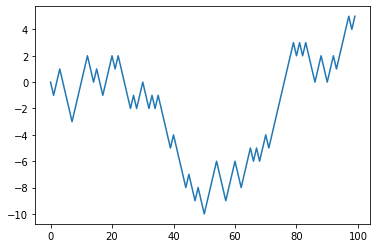

In [236]:
plt.plot(walk[:100])

In [237]:
nsteps = 1000

In [238]:
draws = np.random.randint(0, 2, size=nsteps)

In [239]:
steps = np.where(draws > 0, 1, -1)

In [240]:
walk = steps.cumsum()

In [241]:
walk.min()

-9

In [242]:
walk.max()

60

In [243]:
(np.abs(walk) >= 10).argmax()

297

In [244]:
nwalks = 5000

In [245]:
nsteps = 1000

In [246]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps))

In [247]:
steps = np.where(draws > 0, 1, -1)

In [248]:
walks = steps.cumsum(1)

In [249]:
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]])

In [250]:
walks.max()

122

In [251]:
walks.min()

-128

In [252]:
hist30 = (np.abs(walks) >= 30).any(1)

In [253]:
hist30

array([ True,  True,  True, ...,  True, False,  True])

In [254]:
crossing_times = (np.abs(walks[hist30]) >= 30).argmax()

In [255]:
crossing_times.mean()

133.0

In [256]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))